<a href="https://colab.research.google.com/github/Ashvini-Gabhane/EDA_of_IT_Employee_Salary_and_Experience_Trends.ipynb/blob/main/EDA_of_IT_Employee_Salary_and_Experience_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the data**

In [20]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Employee Data.zip")

**Understand** **the Dataset**

In [21]:
print(df.head())

   ID Gender  Experience (Years)               Position  Salary
0   1      F                   4        DevOps Engineer  109976
1   2      M                   6        DevOps Engineer  120088
2   3      M                  17          Web Developer  181301
3   4      M                   7  Systems Administrator   77530
4   5      F                  13  Systems Administrator  152397


In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  400 non-null    int64 
 1   Gender              400 non-null    object
 2   Experience (Years)  400 non-null    int64 
 3   Position            400 non-null    object
 4   Salary              400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB
None


In [23]:
print(df.describe())

               ID  Experience (Years)        Salary
count  400.000000          400.000000     400.00000
mean   200.500000            9.670000  131701.19750
std    115.614301            6.101571   43351.50899
min      1.000000            0.000000   43643.00000
25%    100.750000            4.000000  100484.75000
50%    200.500000           10.000000  128561.50000
75%    300.250000           15.000000  157735.00000
max    400.000000           20.000000  269950.00000


**Clean the Data**

In [24]:

df.columns = df.columns.str.strip()
print(df.isnull().sum())

ID                    0
Gender                0
Experience (Years)    0
Position              0
Salary                0
dtype: int64


**Exploratory Data Analysis**

 **Gender and Position Distribution**

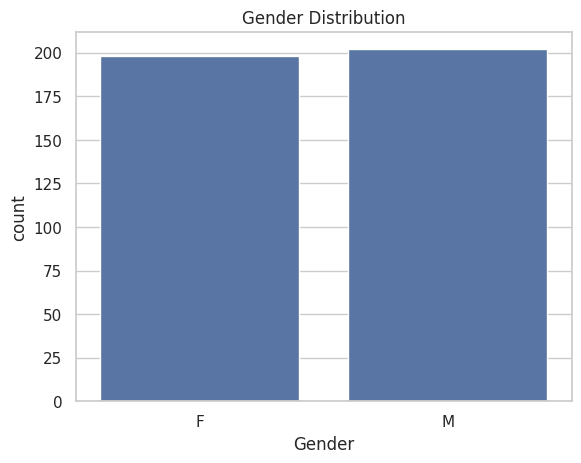

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

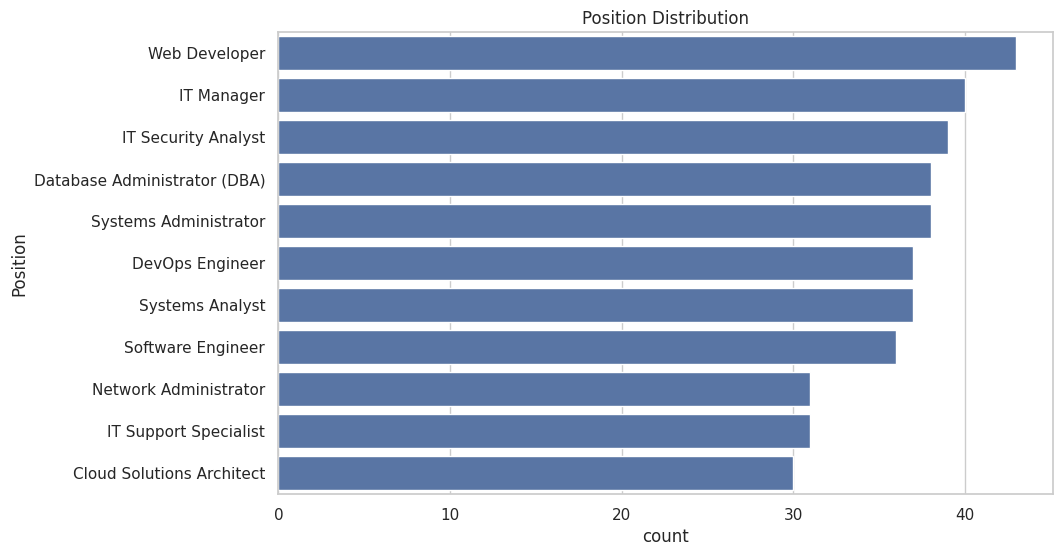

In [26]:

plt.figure(figsize=(10, 6))
sns.countplot(y='Position', data=df, order=df['Position'].value_counts().index)
plt.title('Position Distribution')
plt.show()

**Salary vs. Experience**

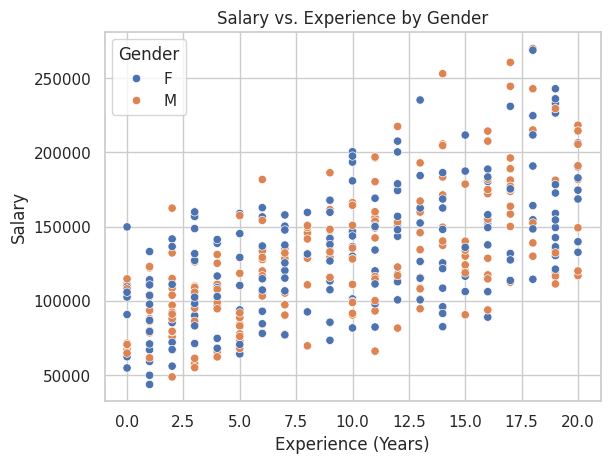

In [27]:
sns.scatterplot(data=df, x='Experience (Years)', y='Salary', hue='Gender')
plt.title("Salary vs. Experience by Gender")
plt.show()


**Average Salary by Gender and Position**

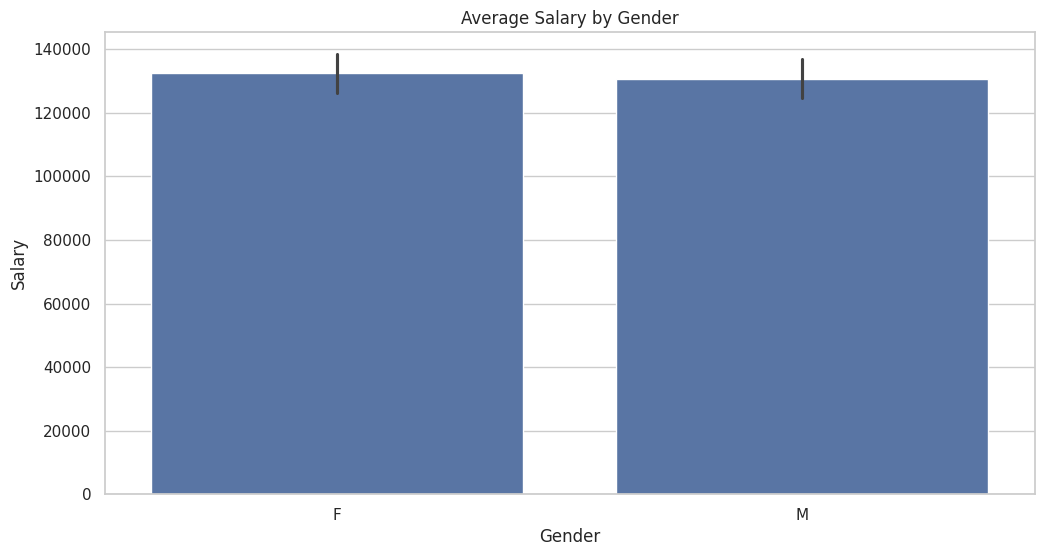

<ipython-input-28-a46e05cc5dc4>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, y='Position', x='Salary', estimator='mean', ci=None, order=df.groupby('Position')['Salary'].mean().sort_values().index)


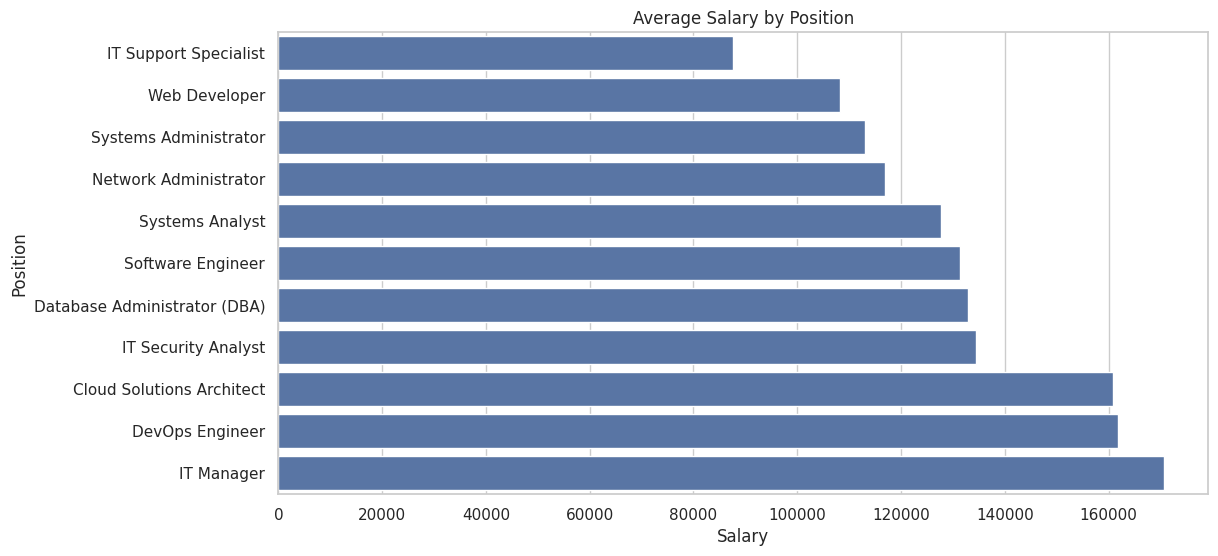

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Gender', y='Salary', estimator='mean')
plt.title("Average Salary by Gender")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df, y='Position', x='Salary', estimator='mean', ci=None, order=df.groupby('Position')['Salary'].mean().sort_values().index)
plt.title("Average Salary by Position")
plt.show()


**Correlation Heatmap**

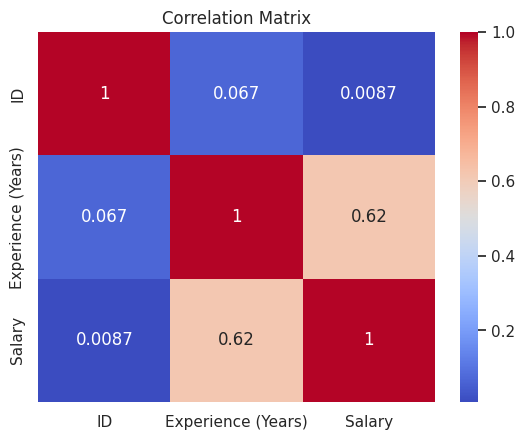

In [29]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


**Insights & Recommendations**

In [30]:
# Average salary per position
avg_salary_by_position = df.groupby("Position")["Salary"].mean().sort_values(ascending=False)
print("Top Paying Roles:\n", avg_salary_by_position.head())

# Gender-based salary analysis
gender_salary = df.groupby("Gender")["Salary"].mean()
print("Average Salary by Gender:\n", gender_salary)


Top Paying Roles:
 Position
IT Manager                      170711.550000
DevOps Engineer                 161859.081081
Cloud Solutions Architect       160841.633333
IT Security Analyst             134440.820513
Database Administrator (DBA)    132864.552632
Name: Salary, dtype: float64
Average Salary by Gender:
 Gender
F    132629.974747
M    130790.811881
Name: Salary, dtype: float64
